In [48]:
# Librerías esenciales para análisis de datos
import pandas as pd
import numpy as np

# Preprocesamiento y escalado
from sklearn.preprocessing import StandardScaler

# Reducción de dimensionalidad para visualización
from sklearn.decomposition import PCA

# 🤖 Clustering
from sklearn.cluster import KMeans

# 🧪 Evaluación de agrupamiento
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Estilo visual de los gráficos
sns.set(style="whitegrid")


In [50]:
# Cargar el dataset

# Cargar el archivo CSV subido recientemente
df = pd.read_csv("MusicInfo.csv")

from sklearn.preprocessing import LabelEncoder

# Crear y aplicar el codificador
label_encoder = LabelEncoder()
df['artist_encoded'] = label_encoder.fit_transform(df['artist'])

# Mostrar las primeras filas para confirmar la carga
df.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_encoded
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,7209
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,5262
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,5194
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,2672
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,5740


In [51]:
# Selección de variables numéricas para el clustering

# Definir la lista de características que usaremos
features = [
    'danceability', 'key', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms', 'year', 'time_signature', 'artist_encoded', 'mode'
]

# Extraer los datos relevantes
X = df[features]

# Mostrar las primeras filas para confirmar
X.head()

,danceability,key,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,time_signature,artist_encoded,mode
0,0.355,1,0.918,-4.360,0.0746,0.001190,0.000000,0.0971,0.240,148.114,222200,2004,4,7209,1
1,0.409,2,0.892,-4.373,0.0336,0.000807,0.000000,0.2070,0.651,174.426,258613,2006,4,5262,1
2,0.508,4,0.826,-5.783,0.0400,0.000175,0.000459,0.0878,0.543,120.012,218920,1991,4,5194,0
3,0.279,9,0.664,-8.851,0.0371,0.000389,0.000655,0.1330,0.490,104.560,237026,2004,4,2672,1
4,0.515,7,0.430,-9.935,0.0369,0.010200,0.000141,0.1290,0.104,91.841,238640,2008,4,5740,1


In [52]:
# Normalización de las variables numéricas

from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para visualización más clara
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Mostrar las primeras filas de los datos normalizados
X_scaled_df.head()

,danceability,key,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,time_signature,artist_encoded,mode
0,-0.774656,-1.208715,0.919413,0.864320,-0.018718,-0.702067,-0.668405,-0.640651,-0.746334,0.830710,-0.269137,-0.001955,0.24269,1.263570,0.764615
1,-0.472704,-0.928450,0.816159,0.861462,-0.558145,-0.703331,-0.668405,-0.045615,0.841907,1.719004,0.069321,0.223776,0.24269,0.463311,0.764615
2,0.080874,-0.367918,0.554052,0.551457,-0.473942,-0.705418,-0.667044,-0.691004,0.424559,-0.118014,-0.299625,-1.469210,0.24269,0.435361,-1.307848
3,-1.199626,1.033410,-0.089301,-0.123078,-0.512096,-0.704712,-0.666462,-0.446276,0.219750,-0.639674,-0.131330,-0.001955,0.24269,-0.601235,0.764615
4,0.120016,0.472879,-1.018589,-0.361407,-0.514728,-0.672316,-0.667987,-0.467933,-1.271883,-1.069068,-0.116328,0.449508,0.24269,0.659779,0.764615


In [53]:
# Reducción de dimensionalidad con PCA (solo para visualización)

from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para visualización
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Mostrar primeras filas
X_pca_df.head()

,PC1,PC2
0,1.319850,-0.673751
1,1.774744,0.036865
2,0.886283,0.552723
3,0.104690,-0.159168
4,-0.796846,0.075923


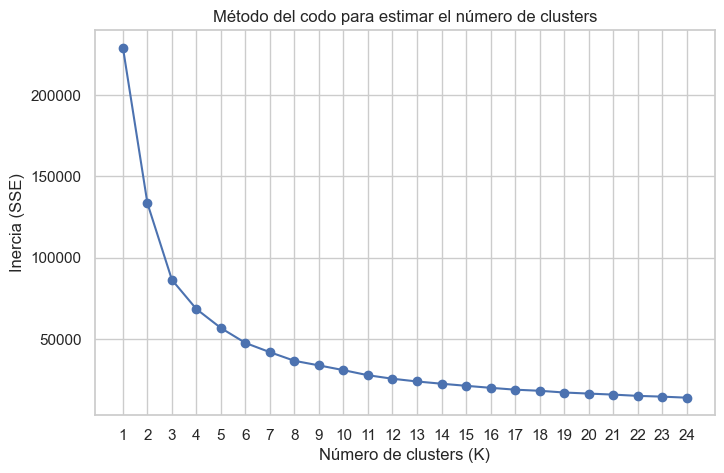

In [59]:
#Método del codo para estimar el número óptimo de clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar valores de K del 1 al 10
inertias = []
K_range = range(1, 25)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Método del codo para estimar el número de clusters')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [61]:
silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    

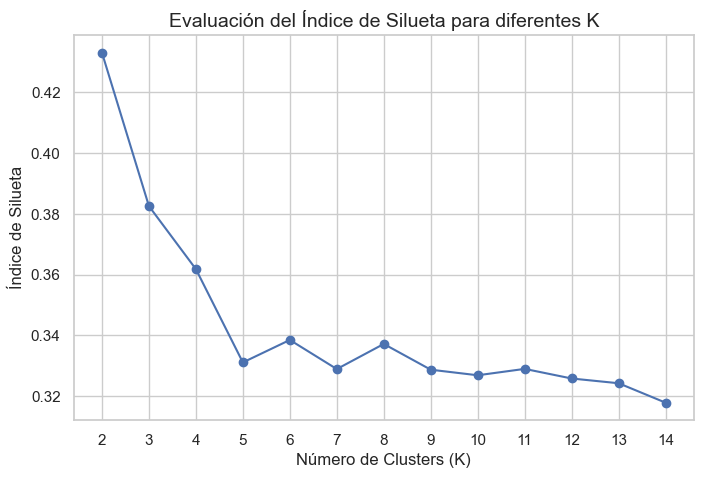

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel("Número de Clusters (K)", fontsize=12)
plt.ylabel("Índice de Silueta", fontsize=12)
plt.title("Evaluación del Índice de Silueta para diferentes K", fontsize=14)
plt.grid(True)
plt.xticks(range(2, 15))
plt.show()


In [65]:
k_optimo = 6
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

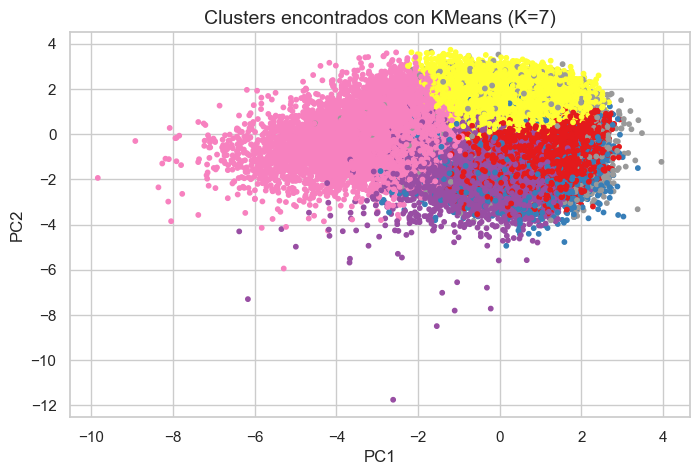

In [66]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='Set1', s=10)
plt.title("Clusters encontrados con KMeans (K=7)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


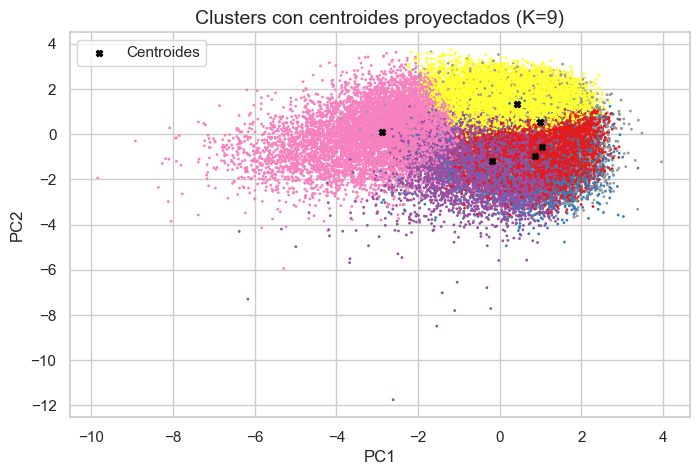

In [67]:
# Proyectar los centroides al mismo espacio PCA
centroides_pca = pca.transform(kmeans.cluster_centers_)

# Dibujar los centroides sobre el gráfico de clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='Set1', s=1)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=20, marker='X', label='Centroides')
plt.title("Clusters con centroides proyectados (K=9)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [68]:
silhouette_score(X_scaled, y_pred)

np.float64(0.09000634827344434)

In [28]:
silhouette_vals = silhouette_samples(X_scaled, y_pred)

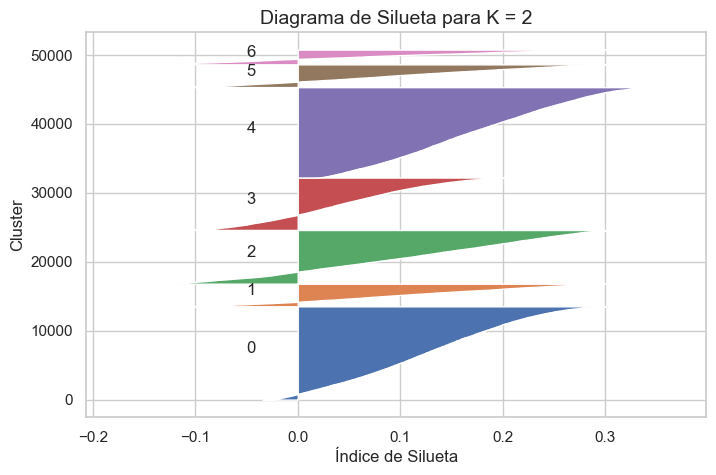

In [29]:
plt.figure(figsize=(8, 5))
y_lower = 10

for i in range(k_optimo):
    cluster_vals = silhouette_vals[y_pred == i]
    cluster_vals.sort()
    size_cluster = cluster_vals.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.xlabel("Índice de Silueta")
plt.ylabel("Cluster")
plt.title("Diagrama de Silueta para K = 2", fontsize=14)
plt.grid(True)
plt.show()


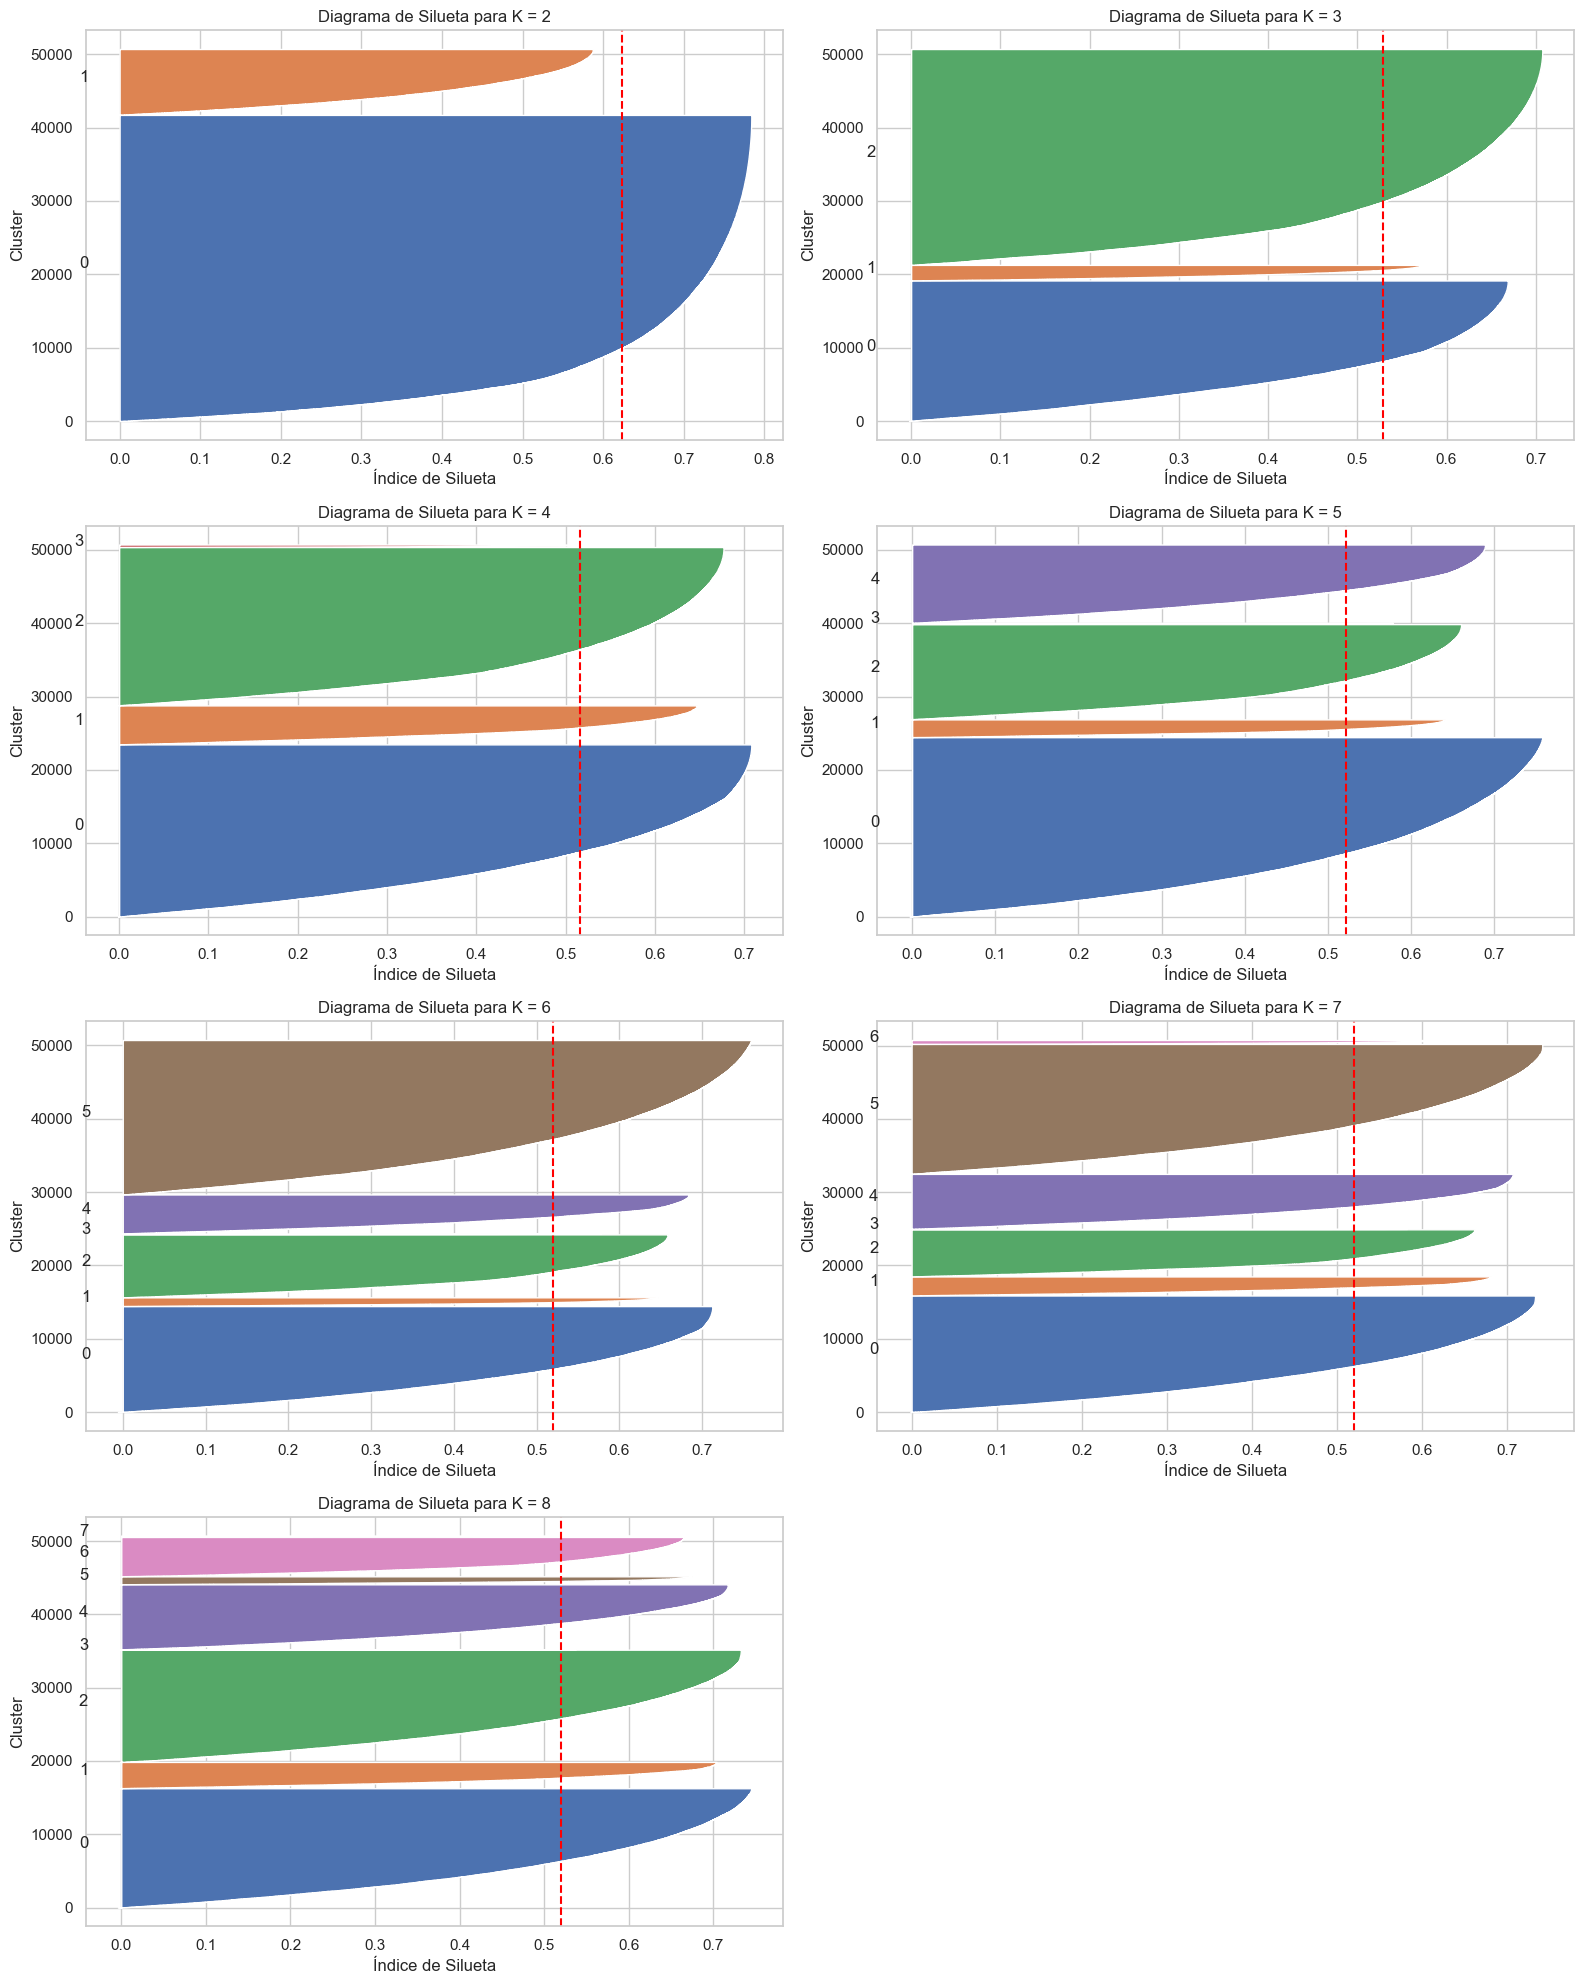

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Valores de k que deseas evaluar
k_values = range(2, 9)

# Crear una figura grande para mostrar todos los gráficos
plt.figure(figsize=(16, 20))

for idx, k in enumerate(k_values):
    # Crear y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Calcular valores de silueta
    silhouette_vals = silhouette_samples(X, y_pred)
    
    # Subgráfico para el valor actual de k
    plt.subplot(4, 2, idx + 1)
    y_lower = 10

    for i in range(k):
        cluster_vals = silhouette_vals[y_pred == i]
        cluster_vals.sort()
        size_cluster = cluster_vals.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_score(X, y_pred), color="red", linestyle="--")
    plt.xlabel("Índice de Silueta")
    plt.ylabel("Cluster")
    plt.title(f"Diagrama de Silueta para K = {k}", fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()
